# **BIOS512 - Final Project**

## Load libraries and Data

In [1]:
# import libraries
library('tidyverse')
library("ggplot2")

options(repr.plot.res = 250, repr.plot.height = 4, repr.plot.width = 4)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
Warning message:
“package ‘stringr’ was built under R version 4.2.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
# read in data
titanic = read_csv(
    'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv',
    col_types = cols()
)   

In [3]:
head(titanic)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,NA,Q


In [4]:
# convert Pclass, Survived, and Sex variables into factors
titanic = titanic |>
    mutate(Pclass = factor(Pclass),
           Survived = factor(Survived),
           Sex = factor(Sex))

## Survival Rate by Gender

In [5]:
srg = titanic |> 
    group_by(Sex, Survived) |>
    summarise(Count = n()) |>
    mutate(Percentage = round(Count / sum(Count) * 100))

srg

`summarise()` has grouped output by 'Sex'. You can override using the `.groups`
argument.


Sex,Survived,Count,Percentage
<fct>,<fct>,<int>,<dbl>
female,0,81,26
female,1,233,74
male,0,468,81
male,1,109,19


In [6]:
gender = titanic |> 
    group_by(Sex) |>
    summarise(Count = n())
gender

Sex,Count
<fct>,<int>
female,314
male,577


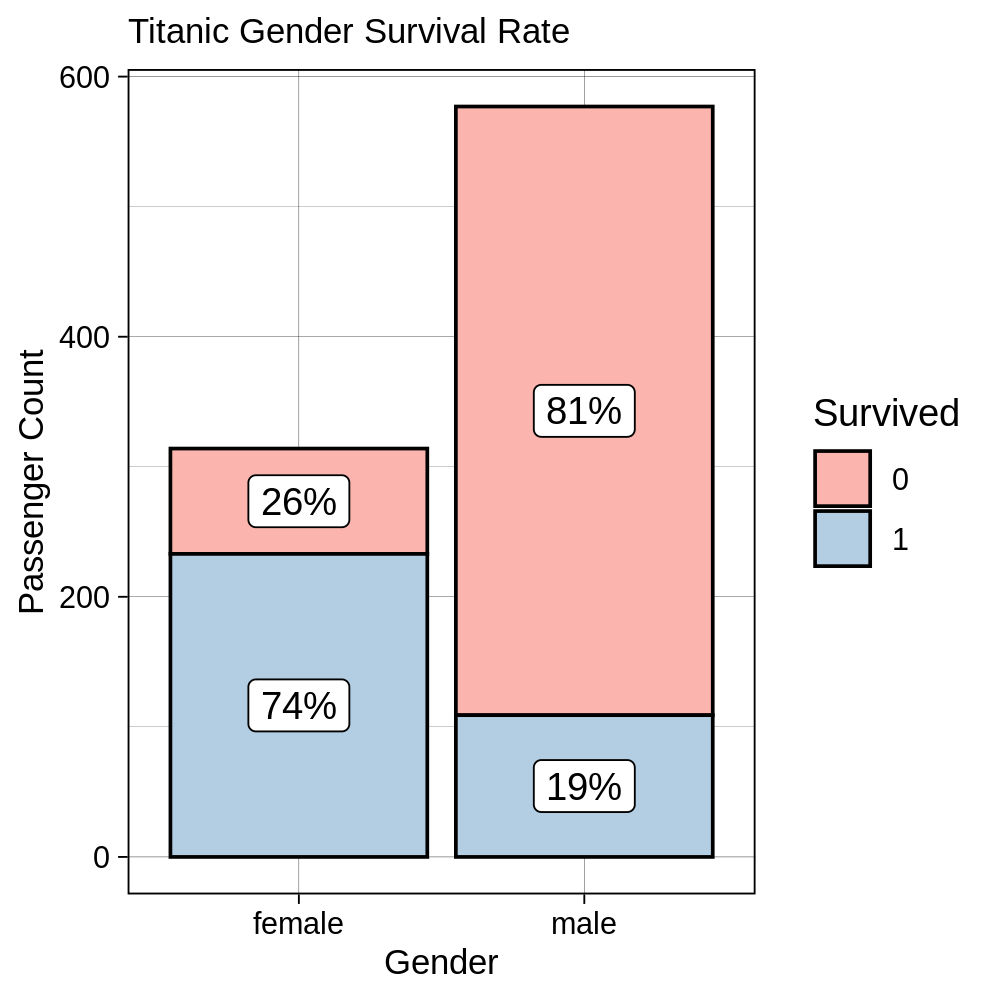

In [7]:
p = titanic |> 
    ggplot() + 
    geom_bar(aes(x = Sex, fill = Survived), colour = "black") +
    labs(x = "Gender", y = "Passenger Count", title = "Titanic Gender Survival Rate") +
    geom_label(data = srg, aes(x = Sex, y = Count, label = paste0(Percentage, "%"), group = Survived), 
             position = position_stack(vjust = 0.5)) +
    scale_fill_brewer(palette = "Pastel1") + 
    theme_linedraw() + 
    theme(
            plot.title = element_text(size = 10),
            axis.title.x = element_text(size = 10),
            axis.title.y = element_text(size = 10)
        ) 
p

From the plot, we can find that although the number of female passengers is less than that of males, the survival rate of female passengers is much greater than males. This proves that after the ship hit the iceberg, the escape of the passengers on board was prioritized for women.

## Survival Rate by Age

Warning message:
“Removed 177 rows containing non-finite values (`stat_bin()`).”


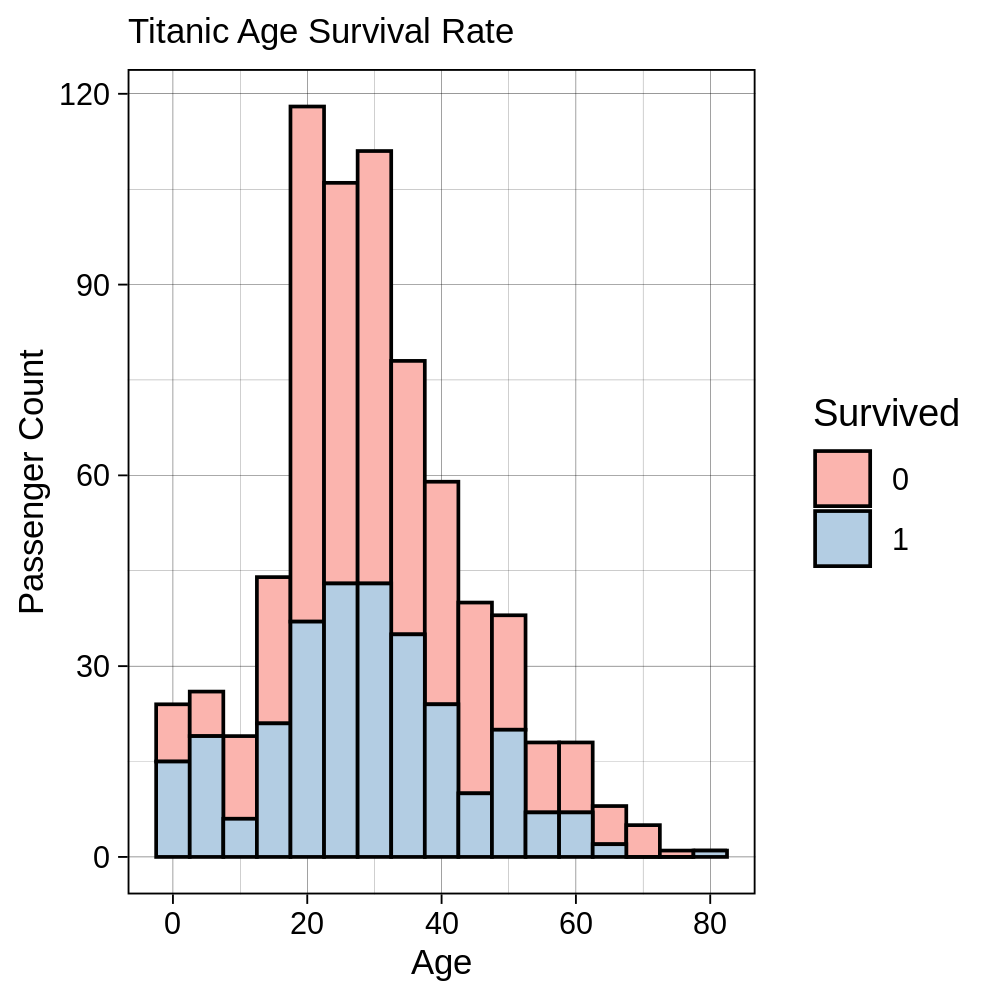

In [8]:
p = titanic |> 
    ggplot() + 
    geom_histogram(aes(x = Age, fill = Survived), binwidth = 5, colour = "black") +
    labs(x = "Age", y = "Passenger Count", title = "Titanic Age Survival Rate") +
    scale_fill_brewer(palette = "Pastel1") + 
    theme_linedraw() + 
    theme(
            plot.title = element_text(size = 10),
            axis.title.x = element_text(size = 10),
            axis.title.y = element_text(size = 10)
        ) 
p

From the Age distribution, we can see that the survivors are mostly concentrated between 20 and 40 years old, which is also the majority age group of passengers on board. In addition to this, it is worth noting that infants and children also have a higher survival rate.

## Survival Rate by Class

In [9]:
src = titanic |> 
    group_by(Pclass, Survived) |>
    summarise(Count = n()) |>
    mutate(Percentage = round(Count / sum(Count) * 100))

src

`summarise()` has grouped output by 'Pclass'. You can override using the
`.groups` argument.


Pclass,Survived,Count,Percentage
<fct>,<fct>,<int>,<dbl>
1,0,80,37
1,1,136,63
2,0,97,53
2,1,87,47
3,0,372,76
3,1,119,24


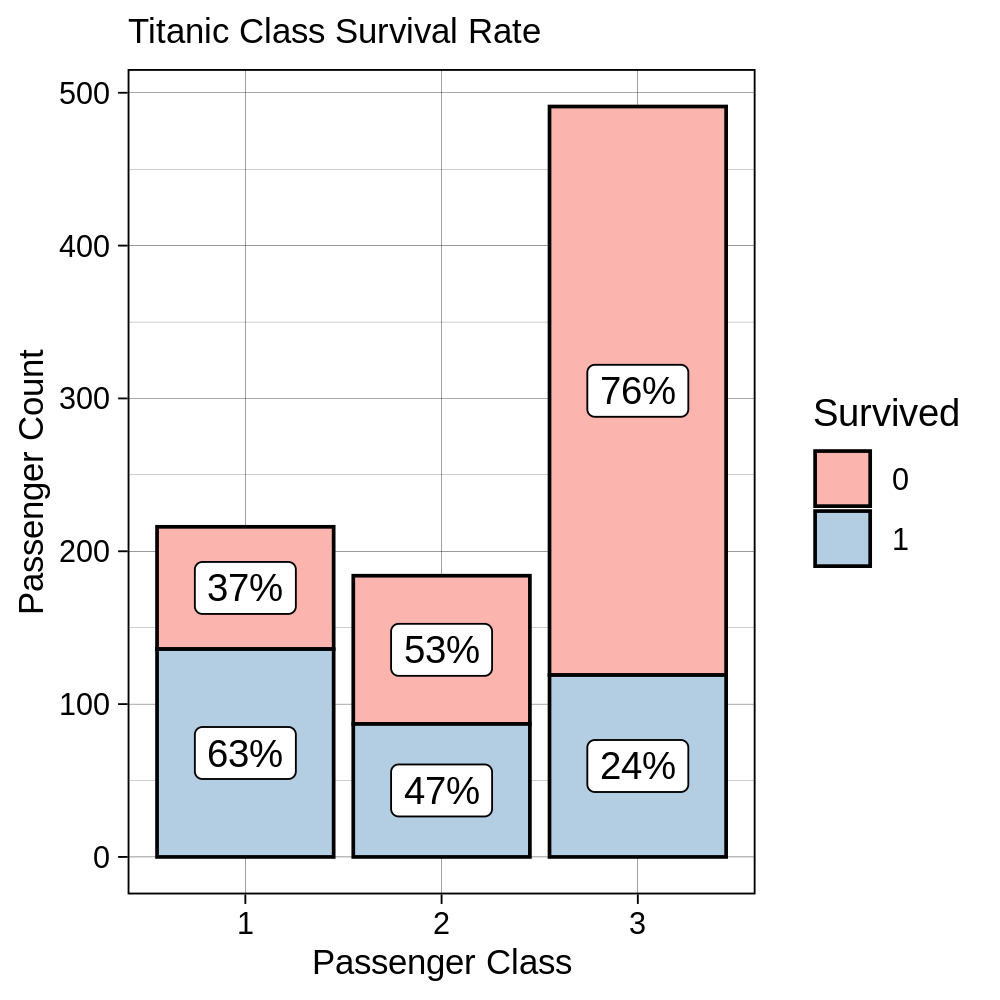

In [10]:
p = titanic |> 
    ggplot() + 
    geom_bar(aes(x = Pclass, fill = Survived), colour = "black") +
    labs(x = "Passenger Class", y = "Passenger Count", title = "Titanic Class Survival Rate") +
    geom_label(data = src, aes(x = Pclass, y = Count, label = paste0(Percentage, "%"), group = Survived), 
             position = position_stack(vjust = 0.5)) +
    scale_fill_brewer(palette = "Pastel1") + 
    theme_linedraw() + 
    theme(
            plot.title = element_text(size = 10),
            axis.title.x = element_text(size = 10),
            axis.title.y = element_text(size = 10)
        ) 
p

We can find that first and second-class passengers have significantly higher survival rates compared to third-class passengers.

## Conclusion

Overall, we can conclude that women and children among the first and second-class passengers in the Titanic incident had a higher survival rate compared to other passengers. And this is to some extent consistent with behavioral preparedness. Women and children should be prioritized for rescue in the event of a disaster (especially a shipwreck) where life-saving resources, such as lifeboats are limited. Also, the class of the cabin has a significant impact on survival rates.